In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загружаем CSV-файл из той же папки, где лежит ноутбук
data = pd.read_csv("S02-hw-dataset.csv")


In [10]:
# Первые строки датасета
data.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [11]:
# ИНформация о столбцах и типах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [12]:
# Базовые описательные статистики
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [17]:
# Посчитать долю пропусков в каждом столбце
print(data.isna().mean())

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64


In [36]:
# Найти и вывести все полностью дублирующие строки
duplicates = data[data.duplicated(keep=False)]

if not duplicates.empty:
    print("Найдены полностью дублирующие строки:")
    print(duplicates)
else:
    print("Полностью дублирующих строк не найдено.")
print("Количество дублирующих строк",data.duplicated().sum())

Найдены полностью дублирующие строки:
    user_id   age country  purchases  revenue
9        10  24.0      RU          7      511
40       10  24.0      RU          7      511
Количество дублирующих строк 1


In [25]:
# Найти и вывести подозрительные случаи по возрасту
strange_age = data[(data['age'] < 0) | (data['age'] > 100)]

if not strange_age.empty:
    print("Найдено", len(strange_age), "строк с нереалистичным возрастом")
    print(strange_age[['user_id', 'age']])
else:
    print("Строк с нереалистичным возрастом не найдено.")

Найдено 1 строк с нереалистичным возрастом:
   user_id    age
5        6  120.0


In [29]:
# Найти и вывести подозрительные случаи по цене
strange_revenue = data[data['revenue'] < 0]

if not strange_revenue.empty:
    print("Найдено", len(strange_age), "строк с нереалистичной ценой")
    print(strange_revenue[['user_id', 'revenue']])
else:
    print("Строк с нереалистичной ценой не найдено.")

Строк с нереалистичной ценой не найдено.


In [30]:
# Найти и вывести подозрительные случаи по количеству
strange_purchases = data[data['purchases']<0]

if not strange_purchases.empty:
    print( "Найдено", len(strange_purchases), "строк с нереалистичным количеством")
    print( strange_purchases[['user_id', 'age']])
else: 
    print(" Строк с нереалистичным количеством не найдено")

Найдено 1 строк с нереалистичным количеством
   user_id    age
5        6  120.0


In [32]:
# Нулевые покупки, но ненулевой доход
revenue_without_purchases = data[(data['purchases'] == 0) & (data['revenue'] > 0)]

if not revenue_without_purchases.empty:
    print ( "Найдено", len(revenue_without_purchases), "строк с нулевыми покупками, но ненелевым доходом")
    print( revenue_without_purchases[['user_id', 'revenue', 'purchases']])
else:
    print("Строк с нулевыми покупками, но ненулевым доходом ненайдено")

Строк с нулевыми покупками, но ненулевым доходом ненайдено


In [39]:
"""
В датасете обнаружены следующие проблемы качества данных:

Во-первых, в столбце age отсутствуют значения у 2 из 41 пользователей (≈4.9%), что может ограничить анализ по возрасту. Во-вторых, имеется одна полностью дублирующая строка (user_id=10), что может искажать агрегированные метрики.

Кроме того, выявлены логически некорректные значения: у одного пользователя (user_id=6) указан возраст 120 лет и отрицательное количество покупок (purchases = -1), что противоречит смыслу данных. Такие наблюдения требуют коррекции или удаления перед дальнейшим анализом
"""

'\nВ датасете обнаружены следующие проблемы качества данных:\n\nВо-первых, в столбце age отсутствуют значения у 2 из 41 пользователей (≈4.9%), что может ограничить анализ по возрасту. Во-вторых, имеется одна полностью дублирующая строка (user_id=10), что может искажать агрегированные метрики.\n\nКроме того, выявлены логически некорректные значения: у одного пользователя (user_id=6) указан возраст 120 лет и отрицательное количество покупок (purchases = -1), что противоречит смыслу данных. Такие наблюдения требуют коррекции или удаления перед дальнейшим анализом\n'

In [2]:
import pandas as pd
data = pd.read_csv("S02-hw-dataset.csv")

# Посчитать частоты для категориальных переменных
print( data['country'].value_counts())

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64


In [5]:
# Выполнить хотя бы одну осмысленную группировку с агрегатами через `groupby`
data.groupby('country').agg(
    avg_revenue=('revenue', 'mean'),   # средний доход
    total_purchases=('purchases', 'sum'),  # общее число покупок
    user_count=('user_id', 'count')    # сколько пользователей
)

,avg_revenue,total_purchases,user_count
country,,,
CN,1054.000000,9,2
DE,1445.500000,39,6
FR,675.916667,51,12
RU,790.076923,62,13
US,557.375000,37,8


In [10]:
# Убираем строки без возраста
data_clean = data.dropna(subset=['age']).copy()  # Явно создаём копию

# Создаём коридоры
bins = [0, 18, 30, 50, 100]
labels = ['<18', '18-30', '31-50', '>50']
data_clean['age_group'] = pd.cut(data_clean['age'], bins=bins, labels=labels)
data_clean.groupby('age_group', observed=True)['revenue'].mean()

age_group
<18      1296.000000
18-30     565.538462
31-50    1022.764706
>50       596.666667
Name: revenue, dtype: float64

In [11]:
"""
Доминируют пользователи из России (13) и Франции (12), но самый высокий средний доход — у Германии (1445.5).
Возрастные группы резко различаются: аномально высокий доход у ребёнка 5 лет (1488), что выглядит как ошибка; реальные взрослые группы (18–50) показывают доход от 565 до 1022.
Неожиданный эффект: пользователь с отрицательным количеством покупок (–1) и возраст 120 лет
"""

'\nДоминируют пользователи из России (13) и Франции (12), но самый высокий средний доход — у Германии (1445.5).\nВозрастные группы резко различаются: аномально высокий доход у ребёнка 5 лет (1488), что выглядит как ошибка; реальные взрослые группы (18–50) показывают доход от 565 до 1022.\nНеожиданный эффект: пользователь с отрицательным количеством покупок (–1) и возраст 120 лет\n'

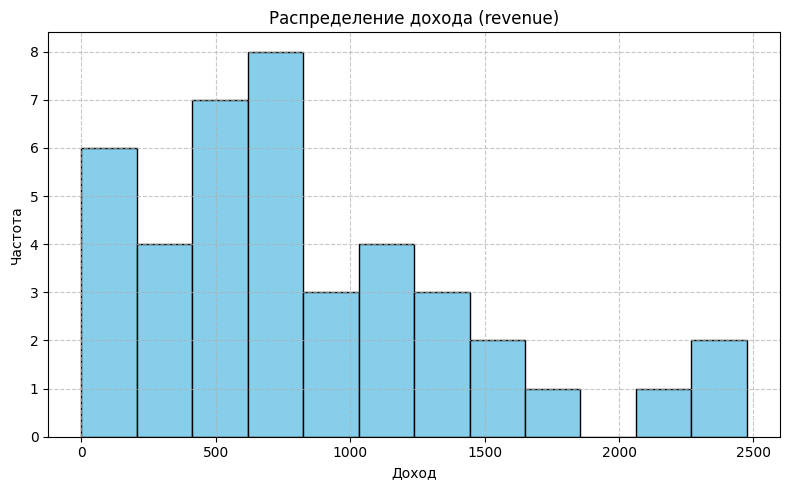

'\nГистограмма показывает распределение дохода по пользователям.\nБольшинство значений сосредоточено в диапазоне 0–1000, но есть несколько высоких значений (>2000),\nчто указывает на правостороннюю асимметрию (возможные выбросы, например, user_id=21 с revenue=1488).\n'

In [12]:
# Визуализация данных в Matplotlib, гистограмма
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 5))
plt.hist(data['revenue'].dropna(), bins=12, color='skyblue', edgecolor='black')
plt.title('Распределение дохода (revenue)')
plt.xlabel('Доход')
plt.ylabel('Частота')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("figures/histogram_revenue.png")  # Сохраняем
plt.show()


# Комментарий:
"""
Гистограмма показывает распределение дохода по пользователям.
Большинство значений сосредоточено в диапазоне 0–1000, но есть несколько высоких значений (>2000),
что указывает на правостороннюю асимметрию (возможные выбросы, например, user_id=21 с revenue=1488).
"""


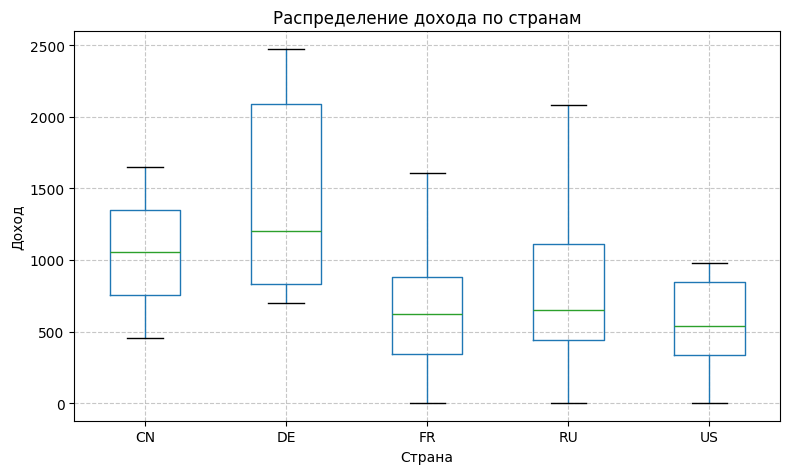

'\nБоксплот по странам показывает, что в Германии (DE) наблюдаются самые высокие медианные доходы\nи присутствуют выбросы (>2000). В США (US) и России (RU) доходы более умеренные.\nВ Китае (CN) всего 2 точки — анализ ограничен.\n'

In [13]:
# Боксплот по странам (revenue)
plt.figure(figsize=(8, 5))
data.boxplot(column='revenue', by='country', ax=plt.gca())
plt.title('Распределение дохода по странам')
plt.suptitle('')  # Убираем автоматический заголовок от pandas
plt.xlabel('Страна')
plt.ylabel('Доход')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("figures/boxplot_revenue_by_country.png")  # Сохраняем
plt.show()

# Комментарий:
"""
Боксплот по странам показывает, что в Германии (DE) наблюдаются самые высокие медианные доходы
и присутствуют выбросы (>2000). В США (US) и России (RU) доходы более умеренные.
В Китае (CN) всего 2 точки — анализ ограничен.
"""

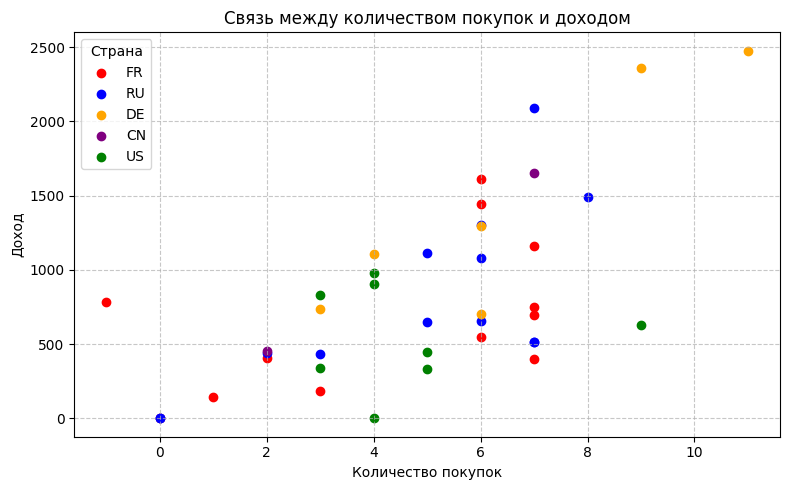

'\nДиаграмма рассеяния показывает общую положительную связь: чем больше покупок — тем выше доход.\nОднако есть аномалии: \n- user_id=6 (FR): purchases=-1, revenue=785 — отрицательные покупки невозможны;\n- user_id=11 (US): purchases=4, revenue=0 — странно, но возможно (возвраты?).\nЦвета помогают увидеть, что пользователи из DE часто находятся в зоне высокого дохода.\n'

In [14]:
# Scatter plot: purchases vs revenue
plt.figure(figsize=(8, 5))
colors = {'FR': 'red', 'RU': 'blue', 'US': 'green', 'DE': 'orange', 'CN': 'purple'}
for country in data['country'].unique():
    subset = data[data['country'] == country]
    plt.scatter(subset['purchases'], subset['revenue'], 
                label=country, color=colors.get(country, 'gray'))

plt.title('Связь между количеством покупок и доходом')
plt.xlabel('Количество покупок')
plt.ylabel('Доход')
plt.legend(title='Страна')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("figures/scatter_purchases_vs_revenue.png")  # Сохраняем
plt.show()

# Комментарий:
"""
Диаграмма рассеяния показывает общую положительную связь: чем больше покупок — тем выше доход.
Однако есть аномалии: 
- user_id=6 (FR): purchases=-1, revenue=785 — отрицательные покупки невозможны;
- user_id=11 (US): purchases=4, revenue=0 — странно, но возможно (возвраты?).
Цвета помогают увидеть, что пользователи из DE часто находятся в зоне высокого дохода.
"""